In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)

In [2]:
tree = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [3]:
tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [4]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [5]:
tree.describe()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,6.837880e+05,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,3.404914e+06,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,1.175863e+06,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100,51.000000,157903.000000,5.515124e+06,5.080500e+09


In [6]:
tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [7]:
tree = tree[['tree_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
     'problems','census tract']]

In [8]:
tree.head()

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,problems,census tract
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,739.0
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,Stones,973.0
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,449.0
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,Stones,449.0
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,Stones,165.0


In [9]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   tree_id       683788 non-null  int64  
 1   created_at    683788 non-null  object 
 2   tree_dbh      683788 non-null  int64  
 3   stump_diam    683788 non-null  int64  
 4   curb_loc      683788 non-null  object 
 5   status        683788 non-null  object 
 6   health        652172 non-null  object 
 7   spc_latin     652169 non-null  object 
 8   spc_common    652169 non-null  object 
 9   steward       652173 non-null  object 
 10  problems      652124 non-null  object 
 11  census tract  677269 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 62.6+ MB


In [10]:
tree.isna().sum()

tree_id             0
created_at          0
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health          31616
spc_latin       31619
spc_common      31619
steward         31615
problems        31664
census tract     6519
dtype: int64

In [11]:
tree[tree['health'].isna()]

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,problems,census tract
37,211205,09/09/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,95.0
57,187807,08/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,415.0
196,208322,09/07/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,445.0
209,209058,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,12806.0
239,203597,09/04/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,08/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,15801.0
683695,170888,08/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,794.0
683697,177922,08/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,176.0
683698,193791,09/01/2015,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,386.0


In [12]:
tree['health'].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [13]:
delet = (( tree['status'] == 'Stump') | ( tree['status'] == 'Dead'))

In [14]:
tree.loc[ delet ,'health'] = tree.loc[delet, 'health'].fillna('Not Applicable')

In [15]:
tree['health'].value_counts()

Good              528850
Fair               96504
Not Applicable     31615
Poor               26818
Name: health, dtype: int64

In [16]:
tree[tree['health'].isna()] = 'Good'

In [17]:
tree.head()

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,problems,census tract
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,739
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,Stones,973
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,449
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,Stones,449
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,Stones,165


In [18]:
tree.isna().sum()

tree_id             0
created_at          0
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
spc_latin       31619
spc_common      31619
steward         31615
problems        31664
census tract     6519
dtype: int64

In [19]:
tree['problems'].value_counts() 

None                                                        426279
Stones                                                       95673
BranchLights                                                 29452
Stones,BranchLights                                          17808
RootOther                                                    11418
                                                             ...  
Stones,BranchLights,Sneakers,BranchOther                         1
Stones,MetalGrates,RootOther,WiresRope,BranchLights              1
MetalGrates,WiresRope,TrunkLights                                1
TrunkOther,BranchLights,Sneakers,BranchOther                     1
RootOther,WiresRope,TrunkLights,BranchLights,BranchOther         1
Name: problems, Length: 233, dtype: int64

## restrict to alive trees

In [20]:
tree = tree[ tree['status'] == 'Alive']
tree

,tree_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,problems,census tract
0,180683,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,739
1,200540,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,Stones,973
2,204026,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,449
3,204337,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,Stones,449
4,189565,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,Stones,165
...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,519
683784,183795,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,707
683785,166161,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,201
683786,184028,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,23502


In [21]:
tree.isna().sum()

tree_id            0
created_at         0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health             0
spc_latin          5
spc_common         5
steward            0
problems          49
census tract    6206
dtype: int64

In [22]:
tree['problems'].value_counts()

None                                                                                      426279
Stones                                                                                     95673
BranchLights                                                                               29452
Stones,BranchLights                                                                        17808
RootOther                                                                                  11418
                                                                                           ...  
MetalGrates,RootOther,TrunkOther,BranchLights,BranchOther                                      1
Stones,RootOther,WiresRope,BranchLights,Sneakers                                               1
MetalGrates,TrunkLights,TrunkOther,BranchOther                                                 1
Stones,MetalGrates,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
MetalGrates,TrunkOther,BranchL

<AxesSubplot:>

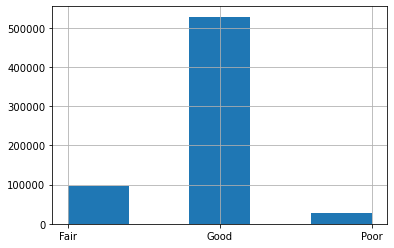

In [23]:
tree['health'].hist( bins=5)

In [24]:
tree['spc_latin'].value_counts()

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64263
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64